# 39 - Data Quality and Preprocessing

**Key Idea:** Good analysis starts with good data. Bad data = bad predictions.

**Analogy:** It's like cooking — fresh ingredients make a better meal. Rotten tomatoes = bad sauce no matter how good the recipe is.

**What We Fix:**
- Clean missing values
- Remove duplicates
- Handle outliers
- Avoid biases (don't only survey happy customers)

**Why It Matters:** Preprocessing makes sure the sample really represents the population.

## Simple Example: Class Test Scores with Data Problems

Imagine we collected test scores from a class, but the data has problems: missing values, duplicates, and one impossible score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Raw data with problems
raw_scores = [85, 92, 78, 85, 88, np.nan, 95, 72, 85, 250, 90, 88, np.nan, 82]

print("Raw Data (with problems):")
print(raw_scores)
print(f"\nNumber of values: {len(raw_scores)}")
print(f"Missing values (NaN): {sum(1 for x in raw_scores if x != x)}")
print(f"Impossible score: 250 (tests are out of 100!)")
print(f"Duplicates: 85 appears 3 times")

Raw Data (with problems):
[85, 92, 78, 85, 88, nan, 95, 72, 85, 250, 90, 88, nan, 82]

Number of values: 14
Missing values (NaN): 2
Impossible score: 250 (tests are out of 100!)
Duplicates: 85 appears 3 times


In [2]:
# Clean the data
# Step 1: Remove missing values
scores_no_missing = [x for x in raw_scores if x == x]  # Filter out NaN

# Step 2: Remove outliers (scores > 100)
cleaned_scores = [x for x in scores_no_missing if x <= 100]

# Step 3: Remove duplicates (keep unique values)
unique_scores = list(set(cleaned_scores))

print("\nCleaned Data:")
print(sorted(cleaned_scores))
print(f"\nNumber of values: {len(cleaned_scores)}")
print(f"Average (raw data with problems): {np.nanmean([x for x in raw_scores if x == x]):.1f}")
print(f"Average (cleaned data): {np.mean(cleaned_scores):.1f}")
print(f"\n→ Cleaning removed bad data and gave us the TRUE average!")


Cleaned Data:
[72, 78, 82, 85, 85, 85, 88, 88, 90, 92, 95]

Number of values: 11
Average (raw data with problems): 99.2
Average (cleaned data): 85.5

→ Cleaning removed bad data and gave us the TRUE average!


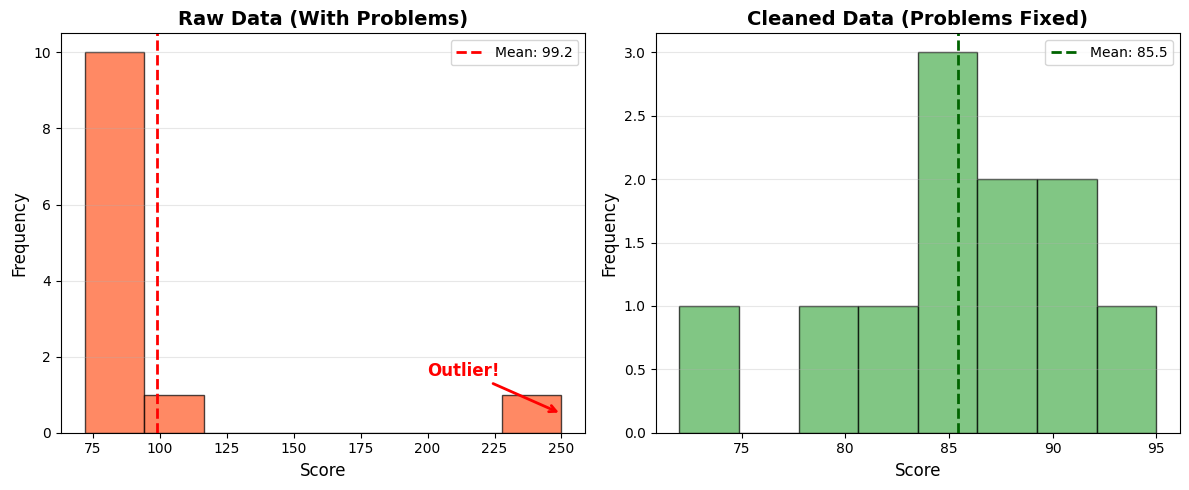


→ Notice how the outlier (250) skewed the average in the raw data!


In [3]:
# Visualize the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Raw data (with outlier)
raw_plot = [x for x in raw_scores if x == x]  # Remove NaN for plotting
ax1.hist(raw_plot, bins=8, color='#FF5722', alpha=0.7, edgecolor='black')
ax1.axvline(np.mean(raw_plot), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(raw_plot):.1f}')
ax1.set_xlabel('Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Raw Data (With Problems)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.annotate('Outlier!', xy=(250, 0.5), xytext=(200, 1.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold')

# Cleaned data
ax2.hist(cleaned_scores, bins=8, color='#4CAF50', alpha=0.7, edgecolor='black')
ax2.axvline(np.mean(cleaned_scores), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {np.mean(cleaned_scores):.1f}')
ax2.set_xlabel('Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Cleaned Data (Problems Fixed)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n→ Notice how the outlier (250) skewed the average in the raw data!")

## Real-World Example: Bank Loan Default Prediction

**Problem:** A bank wants to predict which customers will default on loans. But they only analyzed customers who paid back loans — this creates **biased data**!

**Why This Is Bad:** If you ignore defaults, your predictions will be wrong because the data doesn't represent reality.

In [4]:
# Simulate bank loan data
np.random.seed(42)

# TRUE population: 1000 customers
# 80% paid back (good), 20% defaulted (bad)
true_paid = 800
true_default = 200

# Credit scores for each group
paid_scores = np.random.normal(700, 50, true_paid)  # Good customers: higher scores
default_scores = np.random.normal(580, 60, true_default)  # Defaulters: lower scores

# BIASED SAMPLE: Bank only analyzes customers who paid back
biased_sample = paid_scores

# PROPER SAMPLE: Includes both paid and defaults
proper_sample = np.concatenate([paid_scores, default_scores])

print("TRUE POPULATION:")
print(f"  Total customers: 1,000")
print(f"  Paid back: {true_paid} (80%)")
print(f"  Defaulted: {true_default} (20%)")
print(f"\nBIASED SAMPLE (only paid-back customers):")
print(f"  Sample size: {len(biased_sample)}")
print(f"  Average credit score: {np.mean(biased_sample):.1f}")
print(f"\nPROPER SAMPLE (includes defaults):")
print(f"  Sample size: {len(proper_sample)}")
print(f"  Average credit score: {np.mean(proper_sample):.1f}")
print(f"\n→ Biased data gives WRONG picture of customer creditworthiness!")

TRUE POPULATION:
  Total customers: 1,000
  Paid back: 800 (80%)
  Defaulted: 200 (20%)

BIASED SAMPLE (only paid-back customers):
  Sample size: 800
  Average credit score: 699.6

PROPER SAMPLE (includes defaults):
  Sample size: 1000
  Average credit score: 677.2

→ Biased data gives WRONG picture of customer creditworthiness!


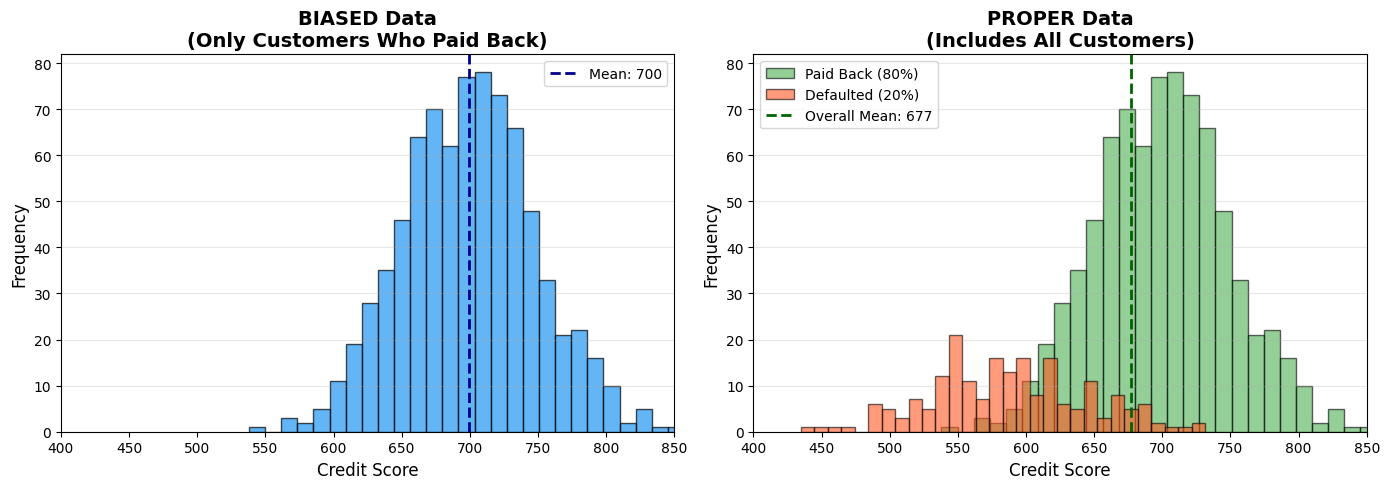


🚨 IMPACT OF BIAS:
  Biased model thinks average customer score is 700
  Reality: average customer score is 677
  Difference: 22 points!

→ Bank would approve risky loans because data doesn't show defaults!
→ This is why preprocessing must avoid bias and include all groups!


In [5]:
# Visualize the bias problem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Biased sample (only paid customers)
ax1.hist(biased_sample, bins=30, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axvline(np.mean(biased_sample), color='darkblue', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(biased_sample):.0f}')
ax1.set_xlabel('Credit Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('BIASED Data\n(Only Customers Who Paid Back)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_xlim(400, 850)

# Proper sample (includes defaults)
ax2.hist(paid_scores, bins=30, color='#4CAF50', alpha=0.6, edgecolor='black', label='Paid Back (80%)')
ax2.hist(default_scores, bins=30, color='#FF5722', alpha=0.6, edgecolor='black', label='Defaulted (20%)')
ax2.axvline(np.mean(proper_sample), color='darkgreen', linestyle='--', linewidth=2, 
           label=f'Overall Mean: {np.mean(proper_sample):.0f}')
ax2.set_xlabel('Credit Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('PROPER Data\n(Includes All Customers)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_xlim(400, 850)

plt.tight_layout()
plt.show()

print("\n🚨 IMPACT OF BIAS:")
print(f"  Biased model thinks average customer score is {np.mean(biased_sample):.0f}")
print(f"  Reality: average customer score is {np.mean(proper_sample):.0f}")
print(f"  Difference: {np.mean(biased_sample) - np.mean(proper_sample):.0f} points!")
print(f"\n→ Bank would approve risky loans because data doesn't show defaults!")
print(f"→ This is why preprocessing must avoid bias and include all groups!")

## Key Takeaways

**Data Quality Checklist:**
1. ✅ Remove missing values (NaN, blanks)
2. ✅ Fix duplicates (keep unique records)
3. ✅ Handle outliers (impossible values like 250/100)
4. ✅ Avoid sampling bias (include all groups, not just successful cases)

**Remember:** 
- 🍅 Fresh ingredients = Good meal
- 📊 Clean data = Good predictions
- ❌ Garbage in = Garbage out!